# DSCI522 Assignment 2

Name: Anushka Deshpande    
USC ID: 5914802345   
Github Username: anushka-deshpande

## 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics.pairwise import euclidean_distances

import warnings
warnings.filterwarnings('ignore')

#### (a) Download the dataset:
Download the Combined Cycle Power Plant data1 from:  
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [2]:
filepath = "../data/CCPP/Folds5x2_pp.xlsx"
data = pd.read_excel(filepath, sheet_name = "Sheet1")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### (b) Data exploration

##### (i) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
rows = data.shape[0]
cols = data.shape[1]

print("Rows: ", rows)
print("Columns: ", cols)

Rows:  9568
Columns:  5


There are **9568 rows** and **5 columns** in this dataset.   
**What do they represent:**  
The columns represent the hourly ambient features over a period of 6 years where each column header stands for headings as follows:  
T - Temperature  
AP - Ambient pressure   
RH - Relative Humidity  
V - Exhaust Vacuum   
PE - Net hourly electrical energy output (Output variable)   


The rows represent the values of each of those features.

##### (ii) Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

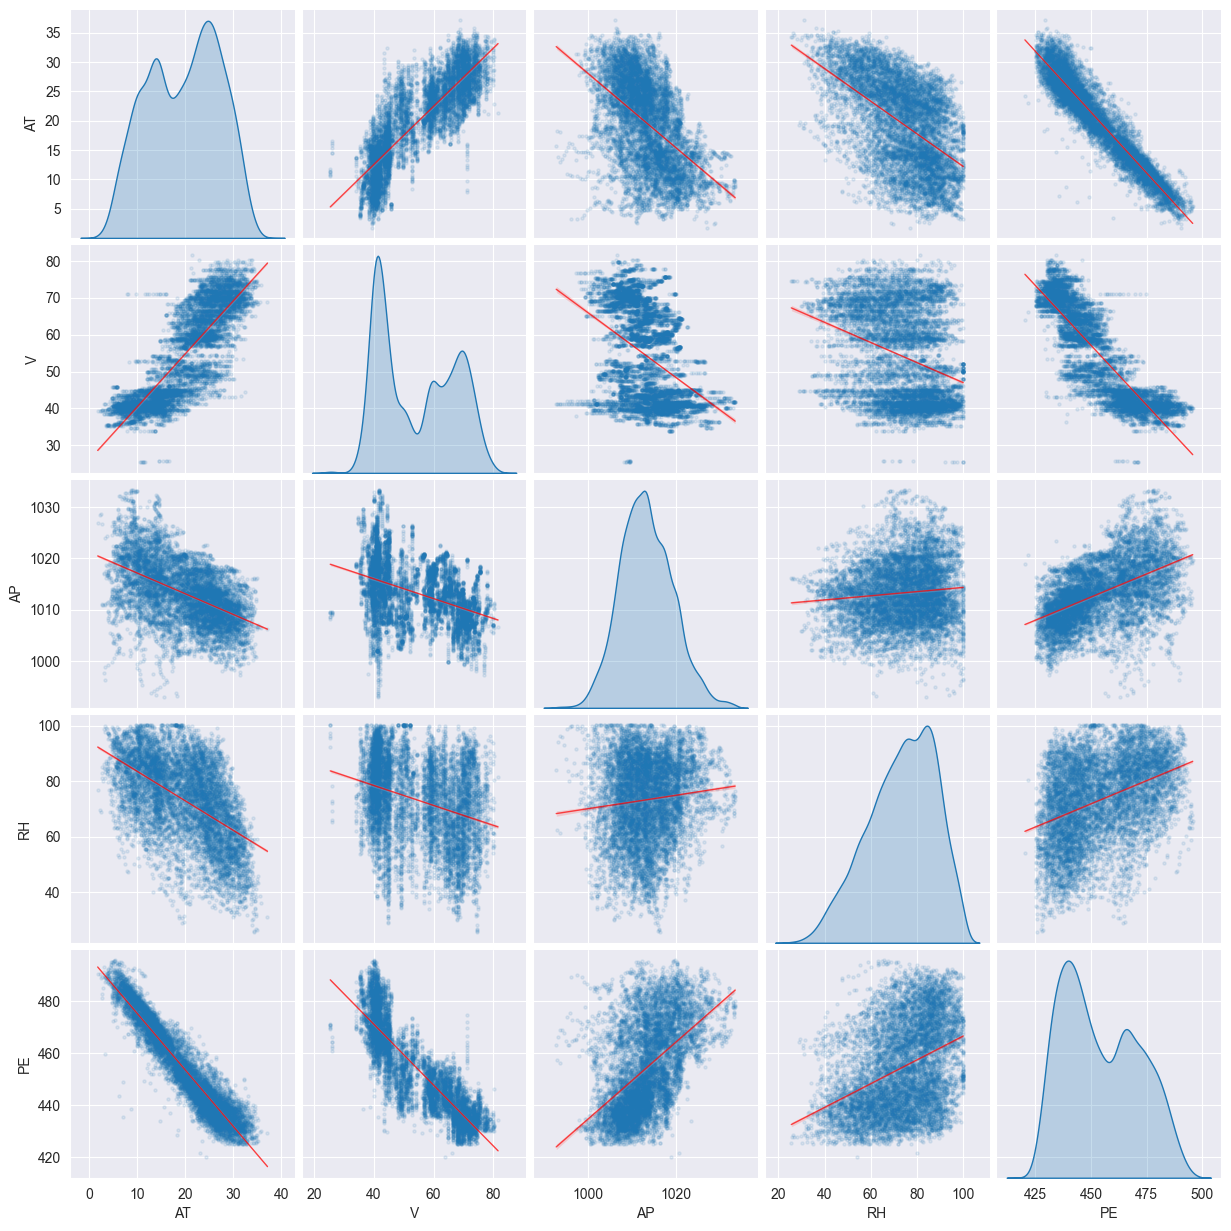

In [4]:
sns.set_style("darkgrid")
pair_plot = sns.pairplot(data, diag_kind="kde", kind="reg",
                         palette=sns.color_palette("rocket_r", as_cmap=True),
                         plot_kws={'line_kws':{'color': 'red', "linewidth": 1, 'alpha': 0.7},
                                   'scatter_kws': {'s': 5, 'alpha': 0.1}})

plt.show()

Describe what you see.  
We can observe that AT and V has a positive correlation.  
Also, they are very likely to have a negative correlation with the output variable, PE.

##### (iii) What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
def getValues(dataset):
  stats = dataset.describe()
  mean = stats["mean"]
  median = stats["50%"]
  range = stats["max"] - stats["min"]
  quartile1 = stats["25%"]
  quartile3 = stats["75%"]
  interquartileRange = quartile3 - quartile1
  return [mean, median, range, quartile1, quartile3, interquartileRange]

In [6]:
values = []

values.append(getValues(data["AT"]))
values.append(getValues(data["V"]))
values.append(getValues(data["AP"]))
values.append(getValues(data["RH"]))
values.append(getValues(data["PE"]))

print(pd.DataFrame(values, index = ['AT', 'V', 'AP', 'RH', 'PE'], columns = ['Mean', 'Median', 'Range', '25%', '75%', 'Interquartile Range']))

           Mean    Median  Range        25%      75%  Interquartile Range
AT    19.651231    20.345  35.30    13.5100    25.72              12.2100
V     54.305804    52.080  56.20    41.7400    66.54              24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26               8.1600
RH    73.308978    74.975  74.60    63.3275    84.83              21.5025
PE   454.365009   451.550  75.50   439.7500   468.43              28.6800


#### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Create and plot regression model for AT

Note: To determine whether an outlier exists, compare the p-value to the significance level. Usually, a significance level (denoted as α or alpha) of 0.05 works well. A significance level of 0.05 indicates a 5% risk of concluding that an outlier exists when no actual outlier exists.

In [7]:
AT = data["AT"].to_numpy()
y = data["PE"].to_numpy()

#train a OLS model
ATx2 = sm.add_constant(AT)
AT_model = sm.OLS(y, ATx2)
AT_result = AT_model.fit()
AT_coefficients = AT_result.params[1]
AT_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:17   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
x1            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[3117, 3383, 3895, 4218, 7375, 7398, 7664, 8187, 8362]


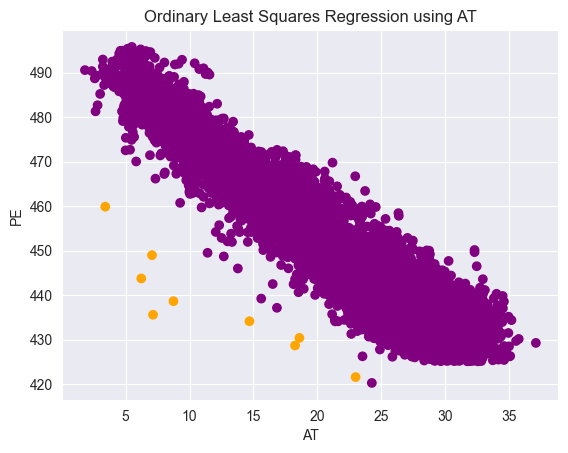

In [8]:
#color outliers differently
ATout_test = AT_result.outlier_test()
AT_colors = []
AT_out_idx = []

for idx in range(len(ATout_test)):
  if ATout_test[idx][2] <0.05:
    AT_out_idx.append(idx)
    AT_colors.append('orange')
  else:
    AT_colors.append('purple')

plt.scatter(AT, y, color=AT_colors)
plt.xlabel("AT")
plt.ylabel("PE")
plt.title("Ordinary Least Squares Regression using AT")

print(AT_out_idx)

In [9]:
AT_out_list = []
index = 0
for idx in AT_out_idx:
  AT_out_list.append([AT[idx],y[idx]])
  index += 1

if len(AT_out_list) > 0:
  AT_out_df = pd.DataFrame(AT_out_list, columns=["AT", "PE"])
  print("Outliers in AT: ")
  print(AT_out_df)

else:
  print("No outliers detected!")

Outliers in AT: 
      AT      PE
0   8.74  438.63
1   6.22  443.73
2  14.69  434.12
3  23.00  421.57
4  18.60  430.38
5   7.06  448.97
6   7.14  435.58
7  18.26  428.67
8   3.40  459.86


Create and plot regression model for V

In [10]:
V = data["V"].to_numpy()
y = data["PE"].to_numpy()

#train a OLS model
Vx2 = sm.add_constant(V)
V_model = sm.OLS(y, Vx2)
V_result = V_model.fit()
V_coefficients = V_result.params[1]
V_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:28   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
x1            -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[3103]


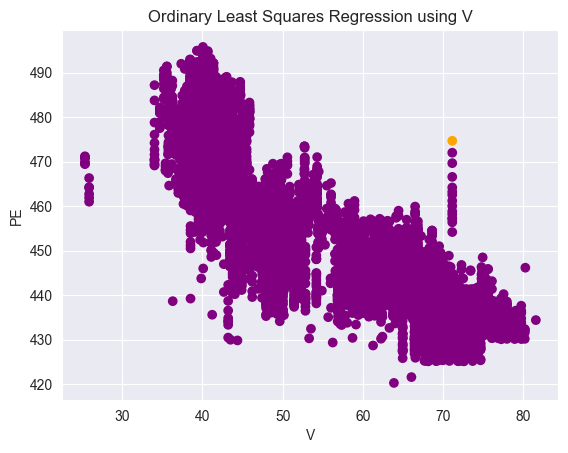

In [11]:
#color outliers differently
Vout_test = V_result.outlier_test()
V_colors = []
V_out_idx = []

for idx in range(len(Vout_test)):
  if Vout_test[idx][2] <0.05:
    V_out_idx.append(idx)
    V_colors.append('orange')
  else:
    V_colors.append('purple')

plt.scatter(V, y, color=V_colors)
plt.xlabel("V")
plt.ylabel("PE")
plt.title("Ordinary Least Squares Regression using V")

print(V_out_idx)

In [12]:
V_out_list = []
index = 0
for idx in V_out_idx:
  V_out_list.append([V[idx],y[idx]])
  index += 1

if len(V_out_list) > 0:
  V_out_df = pd.DataFrame(V_out_list, columns=["V", "PE"])
  print("Outliers in V: ")
  print(V_out_df)

else:
  print("No outliers detected!")

Outliers in V: 
       V      PE
0  71.14  474.66


Create and plot regression model for AP

In [13]:
AP = data["AP"].to_numpy()
y = data["PE"].to_numpy()

#train a OLS model
APx2 = sm.add_constant(AP)
AP_model = sm.OLS(y, APx2)
AP_result = AP_model.fit()
AP_coefficients = AP_result.params[1]
AP_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:38   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
x1             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we have a statistical significance where the model indicates the possibility of strong multicollinearity between AP and PE.

[]


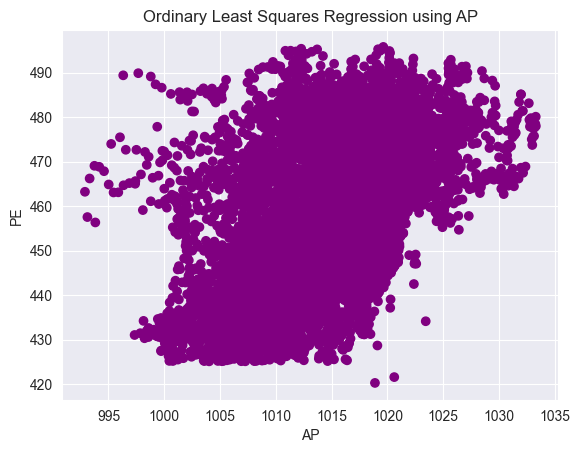

In [14]:
#color outliers differently
APout_test = AP_result.outlier_test()
AP_colors = []
AP_out_idx = []

for idx in range(len(APout_test)):
  if APout_test[idx][2] <0.05:
    AP_out_idx.append(idx)
    AP_colors.append('orange')
  else:
    AP_colors.append('purple')

plt.scatter(AP, y, color=AP_colors)
plt.xlabel("AP")
plt.ylabel("PE")
plt.title("Ordinary Least Squares Regression using AP")

print(AP_out_idx)

In [15]:
AP_out_list = []
index = 0
for idx in AP_out_idx:
  AP_out_list.append([AP[idx],y[idx]])
  index += 1

if len(AP_out_list) > 0:
  AP_out_df = pd.DataFrame(AP_out_list, columns=["AP", "PE"])
  print("Outliers in AP: ")
  print(AP_out_df)

else:
  print("No outliers detected!")

No outliers detected!


Create and plot regression model for RH

In [16]:
RH = data["RH"].to_numpy()
y = data["PE"].to_numpy()

#train a OLS model
RHx2 = sm.add_constant(RH)
RH_model = sm.OLS(y, RHx2)
RH_result = RH_model.fit()
RH_coefficients = RH_result.params[1]
RH_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:47   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
x1             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[]


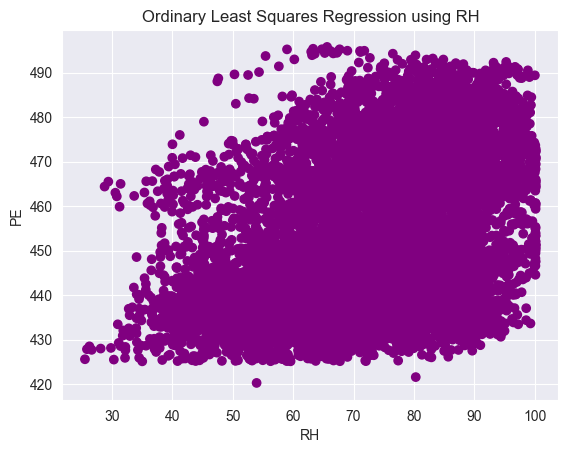

In [17]:
#color outliers differently
RHout_test = RH_result.outlier_test()
RH_colors = []
RH_out_idx = []

for idx in range(len(RHout_test)):
  if RHout_test[idx][2] <0.05:
    RH_out_idx.append(idx)
    RH_colors.append('orange')
  else:
    RH_colors.append('purple')

plt.scatter(RH, y, color=RH_colors)
plt.xlabel("RH")
plt.ylabel("PE")
plt.title("Ordinary Least Squares Regression using RH")

print(RH_out_idx)

In [18]:
RH_out_list = []
index = 0
for idx in RH_out_idx:
  RH_out_list.append([RH[idx],y[idx]])
  index += 1

if len(RH_out_list) > 0:
  RH_out_df = pd.DataFrame(RH_out_list, columns=["RH", "PE"])
  print("Outliers in RH: ")
  print(RH_out_df)

else:
  print("No outliers detected!")

No outliers detected!


 #### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [19]:
X = data.drop(columns=["PE"]).to_numpy()
y = data["PE"].to_numpy()

x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
result = model.fit()
all_feature_coefficients = result.params[1:]
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:57   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
x1            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
x2            -0.2339      0.007    -32.122      0.000      -0.248      -0.220
x3             0.0621      0.009      6.564      0.000       0.044       0.081
x4            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, it can be observed that AT, V, AP, and Rh have a very small value of p (0.000) which means that they are significant. Hence, we can reject the null hypothesis for all H0:βj=0.

#### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

Text(0.5, 1.0, 'Coefficient comparison between simple and multiple linear regression')

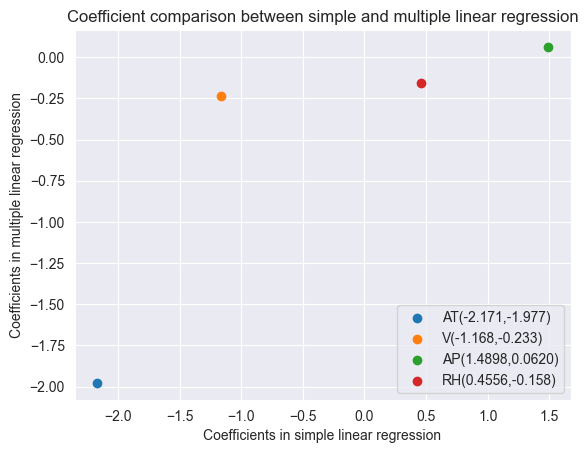

In [20]:
linear_feature_coefficients=[AT_coefficients,V_coefficients,AP_coefficients,RH_coefficients]
column_names=['AT','V','AP','RH','PE']

for i in range(len(linear_feature_coefficients)):
    plt.scatter(linear_feature_coefficients[i],all_feature_coefficients[i], label=column_names[i]+"("+str(linear_feature_coefficients[i])[:6]+
                ","+str(all_feature_coefficients[i])[:6]+")")
plt.legend()
plt.xlabel("Coefficients in simple linear regression")
plt.ylabel("Coefficients in multiple linear regression")
plt.title("Coefficient comparison between simple and multiple linear regression")


#### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form   
Y = β0 + β1X + β2X 2 + β3X 3 + ...

For AT vs PE

In [21]:
AT_new = np.stack([data.AT.to_numpy(),(data.AT**2).to_numpy(), (data.AT**3).to_numpy()], axis=1)
y = data["PE"].to_numpy()

#train a OLS model
ATnew_x2 = sm.add_constant(AT_new)
ATnew_model = sm.OLS(y, ATnew_x2)
ATnew_result = ATnew_model.fit()
ATnew_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the p values for AT are very small, which indicate a non-linear association between AT and PE.

For V vs PE

In [22]:
V_new = np.stack([data.V.to_numpy(),(data.V**2).to_numpy(), (data.V**3).to_numpy()], axis=1)
y = data["PE"].to_numpy()

#train a OLS model
Vnew_x2 = sm.add_constant(V_new)
Vnew_model = sm.OLS(y, Vnew_x2)
Vnew_result = Vnew_model.fit()
Vnew_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p value for V^2 is very large, and therefore we cannot ignore the null hypothesis for V^2. Also, the p value for V^3 is not small enough to be ignored.   
Hence, we can conclude that V does not have a non-linear association between V and PE.

For AP vs PE

In [23]:
AP_new = np.stack([data.AP.to_numpy(),(data.AP**2).to_numpy(), (data.AP**3).to_numpy()], axis=1)
y = data["PE"].to_numpy()

#train a OLS model
APnew_x2 = sm.add_constant(AP_new)
APnew_model = sm.OLS(y, APnew_x2)
APnew_result = APnew_model.fit()
APnew_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the p values are very small (0.000) which implies a non linear association between predictor AP and response PE.

For RH vs PE

In [24]:
RH_new = np.stack([data.RH.to_numpy(),(data.RH**2).to_numpy(), (data.RH**3).to_numpy()], axis=1)
y = data["PE"].to_numpy()

#train a OLS model
RHnew_x2 = sm.add_constant(RH_new)
RHnew_model = sm.OLS(y, RHnew_x2)
RHnew_result = RHnew_model.fit()
RHnew_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
x1            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
x2             0.0321      0.007      4.433      0.000       0.018       0.046
x3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the p values are very small (0.000) which implies a non linear association between predictor RH and response PE.

#### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [25]:
interaction_terms = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
X = data.drop(columns=["PE"]).to_numpy()
y = data["PE"].to_numpy()

x2 = sm.add_constant(X)
pairwise_model = smf.ols(formula = interaction_terms, data = data).fit()
print(pairwise_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Observations:  
*   Considering p = 0.05, **V, AP, RH, AT:V, AT:RH, V:AP, AP:RH** are statistically significant.
*   Considering p = 0.1, **AT, V:RH** are statistically significant.
*   **AT:AP** has a very large p-values and is not statistically significant.



(h). Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [26]:
X = data.drop(columns=["PE"])
y = data["PE"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.7, random_state=0)

print(data.shape)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(9568, 5)
(6697, 4)
(6697,)
(2871, 4)
(2871,)


In [27]:
train_70 = pd.concat([Xtrain, ytrain], axis=1)
print(train_70.shape)

test_70 = pd.concat([Xtest, ytest], axis=1)
print(test_70.shape)

(6697, 5)
(2871, 5)


In [28]:
error_summary = {}

def train_model(method, formula):
  model = smf.ols(formula, train_70).fit()
  print(model.summary())
  trainY_predictions = model.predict(Xtrain)
  testY_predictions = model.predict(Xtest)

  mse_train = mean_squared_error(ytrain, trainY_predictions)
  mse_test = mean_squared_error(ytest, testY_predictions)

  error_summary[method] = [mse_train, mse_test]

  output = {
      "formula": formula,
      "train_mse": round(mse_train,4),
      "test_mse": round(mse_test,4)
  }

  return output

In [29]:
all_predictors_formula = "PE ~ AT + V + AP + RH"
all_predictors_errors = train_model("All predictors LR", all_predictors_formula)

print("\nAll predictors linear regression")
print("train_mse: ", all_predictors_errors["train_mse"])
print("test_mse: ", all_predictors_errors["test_mse"])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.5613     11.745     38.192      0.0

In [30]:
inter_quad_formula = "PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH"
inter_quad_errors = train_model("Inter-quad LR", inter_quad_formula)

print("\ninter quad terms linear regression")
print("train_mse: ", inter_quad_errors["train_mse"])
print("test_mse: ", inter_quad_errors["test_mse"])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7073.1567   1505.522     

Based on the results of regression analysis performed above, we cannot reject the null hypothesis for **AT, V, V^2, AT:AP, V:AP and V:RH**. Thereforre we remove the 2-order terms. Now, even if AT and V have large p-values, removing the basic predictors violates the hierarchical principle when including AT:V.

Note: for every run, the data is shuffled while splitting, hence the output is going to vary for every run.

In [31]:
remove_insignificant_formula = "PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*RH + AP*RH"
remove_insignificant_errors = train_model("remove insignificant predictors LR", remove_insignificant_formula)

print("\nremove insignificant predictors linear regression")
print("train_mse: ", remove_insignificant_errors["train_mse"])
print("test_mse: ", remove_insignificant_errors["test_mse"])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.001e+04   1121.577     

#### (i) Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k : 1,2, ... 100 that gives you the best fit. Plot the train and test errors in terms of 1/k.

Normalized features

Training for Normalized feature values
k:  6.0
Train error:  10.4925
Test Error:  14.6597


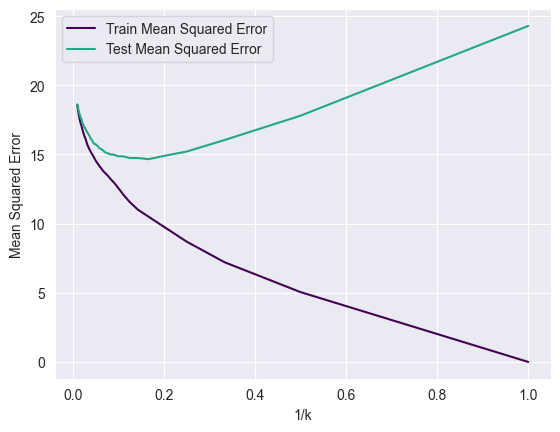

In [32]:
norm_k_rev = []
norm_train_error = []
norm_test_error = []
norm_min_index = 0

print("Training for Normalized feature values")

scaler = MinMaxScaler()

norm_Xtrain = scaler.fit_transform(Xtrain)
norm_Xtest = scaler.fit_transform(Xtest)

for k in range(1, 101):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(norm_Xtrain, ytrain)
  norm_k_rev.append(1/k)

  norm_train_predict = knn.predict(norm_Xtrain)
  norm_test_predict = knn.predict(norm_Xtest)

  norm_train_mse = mean_squared_error(ytrain, norm_train_predict)
  norm_test_mse = mean_squared_error(ytest, norm_test_predict)

  norm_train_error.append(norm_train_mse)
  norm_test_error.append(norm_test_mse)

  if norm_test_mse < norm_test_error[norm_min_index]:
    norm_min_index = k - 1

print("k: ", round((1 / norm_k_rev[norm_min_index]), 4))
print("Train error: ", round(norm_train_error[norm_min_index], 4))
print("Test Error: ", round(norm_test_error[norm_min_index], 4))
plt.plot(norm_k_rev, norm_train_error, label="Train Mean Squared Error", color = "#440154FF")
plt.plot(norm_k_rev, norm_test_error, label="Test Mean Squared Error", color = "#22A884FF")
plt.gca().set_xlabel("1/k")
plt.gca().set_ylabel("Mean Squared Error")
plt.gca().legend()
plt.show()

Training for Raw feature values
k:  5.0
Train error:  10.8264
Test Error:  15.6635


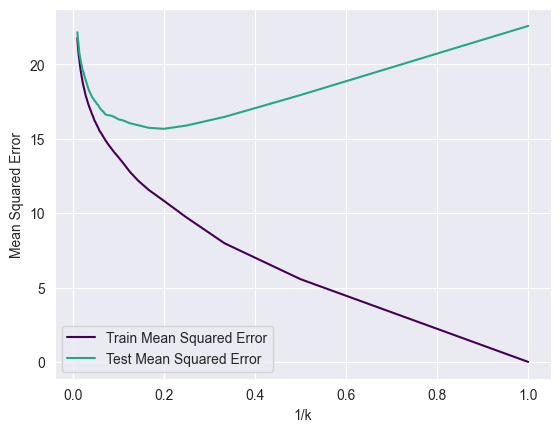

In [33]:
k_rev = []
train_error = []
test_error = []
min_index = 0

print("Training for Raw feature values")

for k in range(1, 101):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(Xtrain, ytrain)
  k_rev.append(1/k)

  train_predict = knn.predict(Xtrain)
  test_predict = knn.predict(Xtest)

  raw_train_mse = mean_squared_error(ytrain, train_predict)
  raw_test_mse = mean_squared_error(ytest, test_predict)

  train_error.append(raw_train_mse)
  test_error.append(raw_test_mse)

  if raw_test_mse < test_error[min_index]:
    min_index = k - 1

print("k: ", round((1 / k_rev[min_index]), 4))
print("Train error: ", round(train_error[min_index], 4))
print("Test Error: ", round(test_error[min_index], 4))
plt.plot(k_rev, train_error, label="Train Mean Squared Error", color = "#440154FF")
plt.plot(k_rev, test_error, label="Test Mean Squared Error", color = "#22A884FF")
plt.gca().set_xlabel("1/k")
plt.gca().set_ylabel("Mean Squared Error")
plt.gca().legend()
plt.show()

#### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [34]:
print("Mode \t\t\t\t\t\t\t Train MSE \t Test MSE")
print(f"All predictors Linear Regression \t\t\t {all_predictors_errors['train_mse']} \t {all_predictors_errors['test_mse']}")
print(f"Inter-quad Terms Linear Regression \t\t\t {inter_quad_errors['train_mse']} \t {inter_quad_errors['test_mse']}")
print(f"Remove Insignificant Predictors Linear Regression \t {remove_insignificant_errors['train_mse']} \t {remove_insignificant_errors['test_mse']}")
print(f"Raw Data Linear Regression \t\t\t\t {round(train_error[min_index], 4)} \t {round(test_error[min_index], 4)}")
print(f"Normalized Data Linear Regression \t\t\t {round(norm_train_error[norm_min_index], 4)} \t {round(norm_test_error[norm_min_index], 4)}")

Mode 							 Train MSE 	 Test MSE
All predictors Linear Regression 			 20.9416 	 20.3684
Inter-quad Terms Linear Regression 			 18.366 	 17.5202
Remove Insignificant Predictors Linear Regression 	 18.3994 	 17.5657
Raw Data Linear Regression 				 10.8264 	 15.6635
Normalized Data Linear Regression 			 10.4925 	 14.6597


We can conclude that KNN is a better predictor that Linear Regression. This can be due to the non-linear nature of the data.

## 2. ISLR 2.4.1  

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

#### (a) The sample size n is extremely large, and the number of predictors p is small.  
> **Flexible learning** method would be better.  
When the sample size is extremely large as compared to the number of predictors, the model tends to underfit if it is an inflexible statistical learning method.

#### (b) The number of predictors p is extremely large, and the number of observations n is small.
> **Inflexible model** will perform better.  
A flexible model will overfit the data when we have a small sample size and more number of predictors.

#### (c) The relationship between the predictors and response is highly non-linear.
> **Flexible model** will perform better.
An inflexible model will not be able to adjust to the variances of a highly non-linear model.

#### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
> **Inflexible model** will perform better.    
A flexible model will overfit because data contains more noise (high variance).

## 3. ISLR: 2.4.7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

#### (a) Compute the Euclidean distance between each observation and the test point, $X1 = X2 = X3 =0$.



| Obs| $X_1$|$X_2$|$X_3$|$Y$|
| -- | -- |-- |--|--|
| 1 | 0 | 3 | 0 | Red |
| 2 | 2 | 0 | 0 | Red |
| 3 | 0 | 1 | 3 | Red |
| 4 | 0 | 1 | 2 | Green |
| 5 | -1 | 0 | 1 | Green |
| 6 | 1 | 1 | 1 | Red |

The euclidean distance between any 2 points in an n-dimensional space is given by -

$ d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $

In [35]:
var = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
test_point = [[0,0,0]]
distances = euclidean_distances(var, test_point)
pd.DataFrame(distances, index=[1,2,3,4,5,6], columns=[f"euclidean_distance from testpoint"])

,euclidean_distance from testpoint
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


#### (b) What is our prediction with $𝐾=1$ ? Why?
- For $K=1$, the output would be Observation number 5 as it is the closest to the test point and k = 1. Therefore, the prediction of Y is Green.

#### (c) What is our prediction with $K = 3$? Why?
- For $K=3$, the output would be Observation numbers 2 (Red), 5 (Green) and 6 (Red). Since the majority is 3 Green vs 1 Red, the output is going to be Green.

#### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?
- The value of K is inversely proportional to the flexibility of the module. As K increases, a more linear boundary is achieved. Since the question states that the decision boundary of the problem is highly non-linear, the value of K would this be small.

## References:

1. https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
3. https://www.statsmodels.org/stable/api.html
4. https://matplotlib.org/stable/tutorials/pyplot.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html  